Download and import the Data Science Job Salary dataset.



In [1]:
!pip install opendatasets
!pip install pandas


In [2]:
import opendatasets as od 


od.download( 
	"https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary") 

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olgasazanova
Your Kaggle Key: ········
Dataset URL: https://www.kaggle.com/datasets/milanvaddoriya/data-science-job-salary


100%|█████████████████████████████████████████████████████████████████████████████████████| 9.97k/9.97k [00:00<?, ?B/s]

In [3]:
import pandas as pd

In [4]:
job_salary = pd.read_csv('datascience_salaries.csv')

In [5]:
job_salary.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary
0,0,Data scientist,Full Time,Senior,New York City,USD,149000
1,2,Data scientist,Full Time,Senior,Boston,USD,120000
2,3,Data scientist,Full Time,Senior,London,USD,68000
3,4,Data scientist,Full Time,Senior,Boston,USD,120000
4,5,Data scientist,Full Time,Senior,New York City,USD,149000


Normalize the ‘salary’ column using Min-Max normalization.


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
job_salary['salary_normalized'] = scaler.fit_transform(job_salary[['salary']])
job_salary.head()

,Unnamed: 0,job_title,job_type,experience_level,location,salary_currency,salary,salary_normalized
0,0,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010
1,2,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
2,3,Data scientist,Full Time,Senior,London,USD,68000,0.191919
3,4,Data scientist,Full Time,Senior,Boston,USD,120000,0.454545
4,5,Data scientist,Full Time,Senior,New York City,USD,149000,0.601010


In [9]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


Implement dimensionality reduction on the dataset.


In [10]:
import numpy as np

In [11]:
from sklearn.decomposition import PCA

#This line creates an instance of the PCA class with the parameter n_components set to 2. It specifies that we want to reduce the dimensionality of the data to 2 principal components. In other words, the data will be projected into a 2D space.
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(job_salary[job_salary.select_dtypes(include=[np.number]).columns])

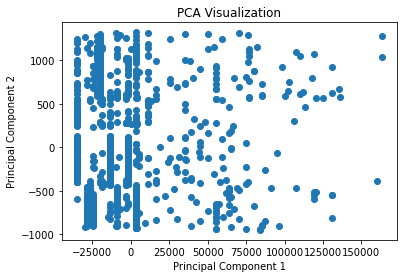

In [12]:
import matplotlib.pyplot as plt
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

Aggregate data by ‘experience_level’, calculating average and median salaries.

In [17]:
avg_sales = job_salary.groupby('experience_level')['salary'].mean()
avg_sales

experience_level
Entry        36111.111111
Executive    76076.923077
Mid          51786.885246
Senior       75088.033012
Name: salary, dtype: float64

In [18]:
median_sales = job_salary.groupby('experience_level')['salary'].median()
median_sales

experience_level
Entry        30000.0
Executive    46000.0
Mid          51000.0
Senior       68000.0
Name: salary, dtype: float64